In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [4]:
patients = {
    1: ['Data/organized_fcs_data1a.csv', 'Data/organized_fcs_data1b.csv', 'Data/organized_fcs_data1c.csv'],
    2: ['Data/organized_fcs_data2a.csv', 'Data/organized_fcs_data2b.csv', 'Data/organized_fcs_data2c.csv'],
    3: ['Data/organized_fcs_data3a.csv', 'Data/organized_fcs_data3b.csv', 'Data/organized_fcs_data3c.csv'],
    4: ['Data/organized_fcs_data4a.csv', 'Data/organized_fcs_data4b.csv', 'Data/organized_fcs_data4c.csv'],
    5: ['Data/organized_fcs_data5a.csv', 'Data/organized_fcs_data5b.csv', 'Data/organized_fcs_data5c.csv'],
    6: ['Data/organized_fcs_data6a.csv', 'Data/organized_fcs_data6b.csv', 'Data/organized_fcs_data6c.csv'],
    7: ['Data/organized_fcs_data7.csv'],
    8: ['Data/organized_fcs_data8a.csv', 'Data/organized_fcs_data8b.csv', 'Data/organized_fcs_data8c.csv'],
    9: ['Data/organized_fcs_data9a.csv', 'Data/organized_fcs_data9b.csv'],
    10: ['Data/organized_fcs_data10a.csv', 'Data/organized_fcs_data10b.csv', 'Data/organized_fcs_data10c.csv'],
    11: ['Data/organized_fcs_data11.csv'],
    12: ['Data/organized_fcs_data12a.csv', 'Data/organized_fcs_data12b.csv', 'Data/organized_fcs_data12c.csv']
}

In [5]:
def load_patient_data(patient_ids):
    all_data = []
    for pid in patient_ids:
        for file in patients[pid]:
            if os.path.exists(file):
                df = pd.read_csv(file)
                df = df.drop(columns=['Time'])  
                all_data.append(df.values)
            else:
                print(f"File not found: {file}")
    if all_data:
        return np.vstack(all_data)
    else:
        return np.empty((0, 14))



In [6]:
healthy_cells = load_patient_data([1, 2, 3, 4, 5, 6])
unhealthy_cells = load_patient_data([7, 8, 9, 10, 11, 12])

In [7]:
# Downsampling to speed up fitting 
print("Subsampling healthy patients data for efficient fitting")
healthy_sample_size = min(len(healthy_cells), 100000)
healthy_sample = healthy_cells[np.random.choice(len(healthy_cells), healthy_sample_size, replace=False)]

Subsampling healthy patients data for efficient fitting


In [8]:
# Scaling data 
print("Scaling data")
scaler = StandardScaler()
healthy_sample_scaled = scaler.fit_transform(healthy_sample)
healthy_cells_scaled = scaler.transform(healthy_cells)
unhealthy_cells_scaled = scaler.transform(unhealthy_cells)

Scaling data


In [9]:
print("Number of components using BIC")
bic_scores = []
lowest_bic = np.inf
best_gmm = None
best_n = None
n_components_range = range(2, 26)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(healthy_sample_scaled)
    bic = gmm.bic(healthy_sample_scaled)
    bic_scores.append(bic)
    print(f"GMM with {n} components - BIC: {bic:.2f}")
    if bic < lowest_bic:
        lowest_bic = bic
        best_gmm = gmm
        best_n = n

print(f"\nBest number of components based on BIC: {best_n}")
joblib.dump(best_gmm, 'gmm_bic.pkl')
print("Model saved")

Number of components using BIC
GMM with 2 components - BIC: 2860892.58
GMM with 3 components - BIC: 2450289.97
GMM with 4 components - BIC: 2345058.78
GMM with 5 components - BIC: 2253307.44
GMM with 6 components - BIC: 2216765.03
GMM with 7 components - BIC: 2161480.71
GMM with 8 components - BIC: 2133252.12
GMM with 9 components - BIC: 2105134.65
GMM with 10 components - BIC: 2085363.25
GMM with 11 components - BIC: 2082099.92
GMM with 12 components - BIC: 2066622.32
GMM with 13 components - BIC: 2045596.68
GMM with 14 components - BIC: 2038261.14
GMM with 15 components - BIC: 2038720.69
GMM with 16 components - BIC: 2034473.25
GMM with 17 components - BIC: 1959519.33
GMM with 18 components - BIC: 1961265.55
GMM with 19 components - BIC: 1890676.94
GMM with 20 components - BIC: 1946757.30
GMM with 21 components - BIC: 1924499.25
GMM with 22 components - BIC: 1878153.50
GMM with 23 components - BIC: 1873675.33
GMM with 24 components - BIC: 1813058.46
GMM with 25 components - BIC: 1811

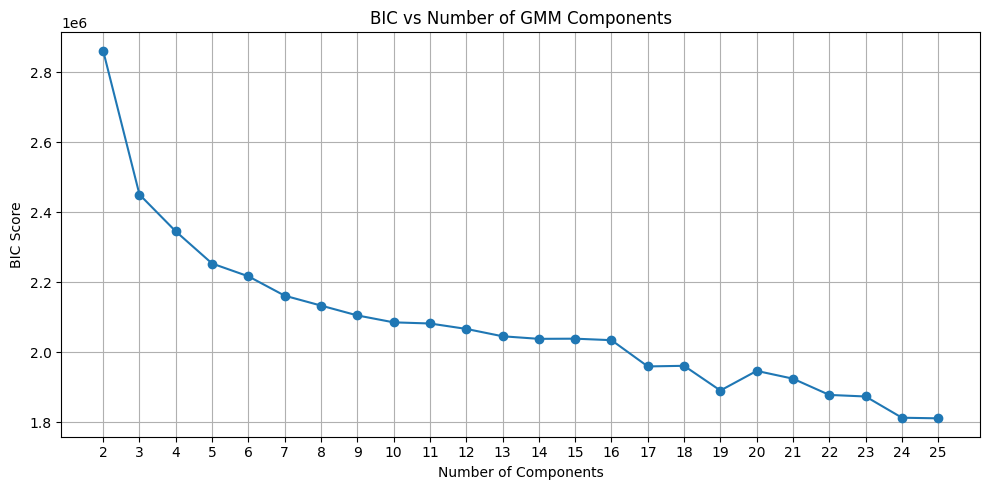

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(2, 26), bic_scores, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC vs Number of GMM Components')
plt.grid(True)
plt.xticks(range(2, 26))
plt.tight_layout()
plt.show()